In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('genres_v2.csv')
df.head()

C:\Users\jiawen\AppData\Local\Temp\ipykernel_22956\3376641696.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df[df['song_name'].isnull()]

# 删除包含 NaN 值的行
df.dropna(subset=['song_name'], inplace=True)

In [4]:
#dropping rows with no song names and no uri and then dropping duplicates as well

# # Drop rows with no song names and no URI
# df = df.dropna(subset=['song_name', 'uri'])

# Drop rows with no URI
df = df.dropna(subset=['uri'])


# Remove duplicate rows based on 'song_name' and 'uri'
df = df.drop_duplicates(subset=['song_name', 'uri'])

# Get the count of final rows
final_row_count = len(df)

print("Count of final rows:", final_row_count)

Count of final rows: 18352


In [5]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


In [6]:
# 加载数据
# 假设 filtered_df 已经定义并包含了数据
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

# 使用 .loc 方法进行赋值
filtered_df.loc[:, num_cols] = scaler.fit_transform(filtered_df[num_cols])

In [7]:
from sklearn.decomposition import PCA

n_components = 2 # 或者 3 进行3D可视化
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])


In [8]:
n_clusters = 4  # 假设有4个聚类
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
pca_df['cluster'] = gmm.fit_predict(pca_result)


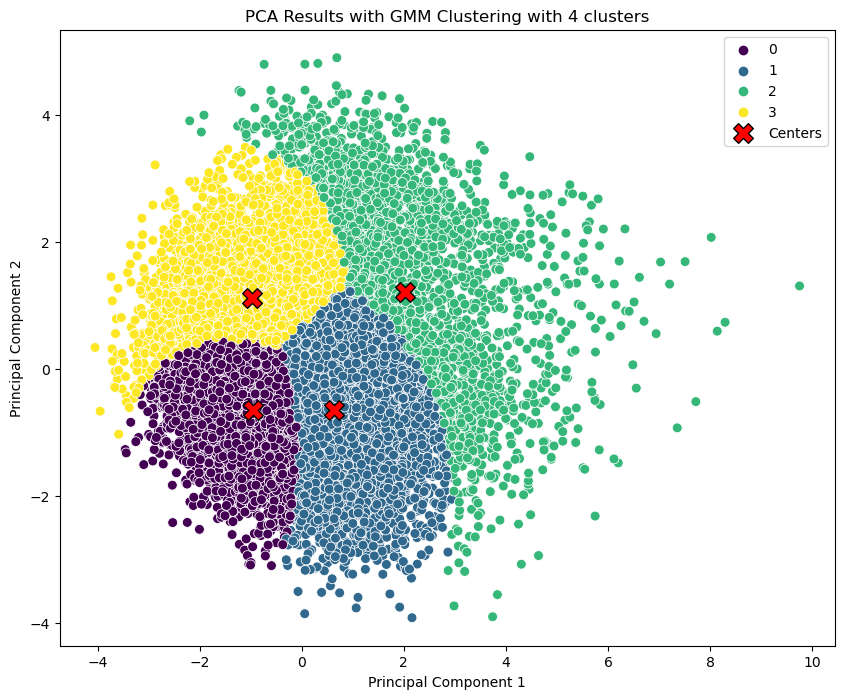

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=pca_df['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with GMM Clustering with {n_clusters} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 绘制每个簇的中心点
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centers')

plt.legend()
plt.show()


Inter-cluster cosine similarity matrix:


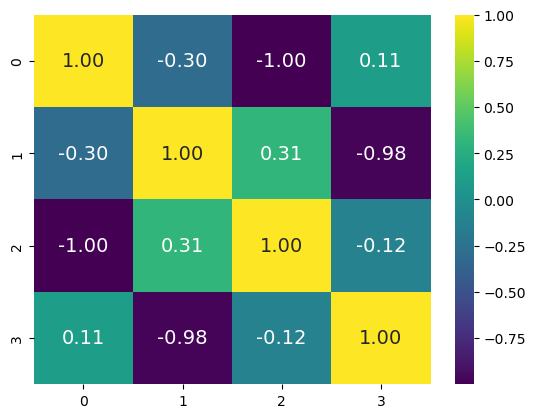

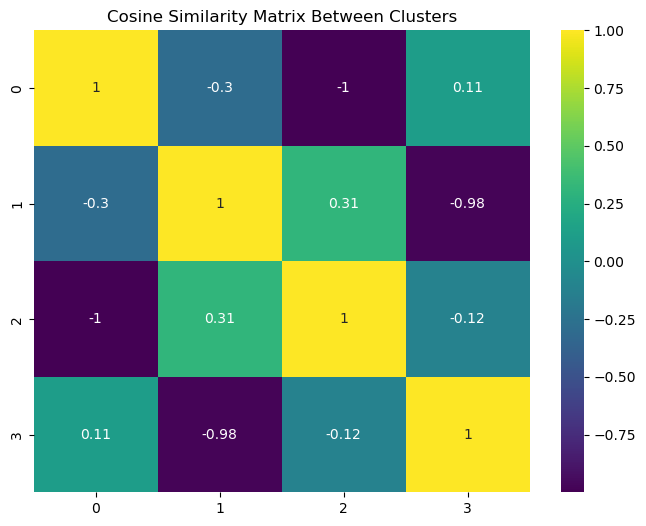

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算每个簇的均值向量
cluster_means = pca_df.groupby('cluster').mean().values

# 计算不同簇之间的余弦相似度
inter_cluster_cosine_sim = cosine_similarity(cluster_means)

# 打印不同簇之间的余弦相似度矩阵
print("Inter-cluster cosine similarity matrix:")
sns.heatmap(pd.DataFrame(inter_cluster_cosine_sim, index=np.unique(pca_df['cluster']), columns=np.unique(pca_df['cluster'])), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 14})

# 可视化不同簇之间的余弦相似度矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(inter_cluster_cosine_sim, index=np.unique(pca_df['cluster']), columns=np.unique(pca_df['cluster'])), cmap='viridis', annot=True)
plt.title('Cosine Similarity Matrix Between Clusters')
plt.show()


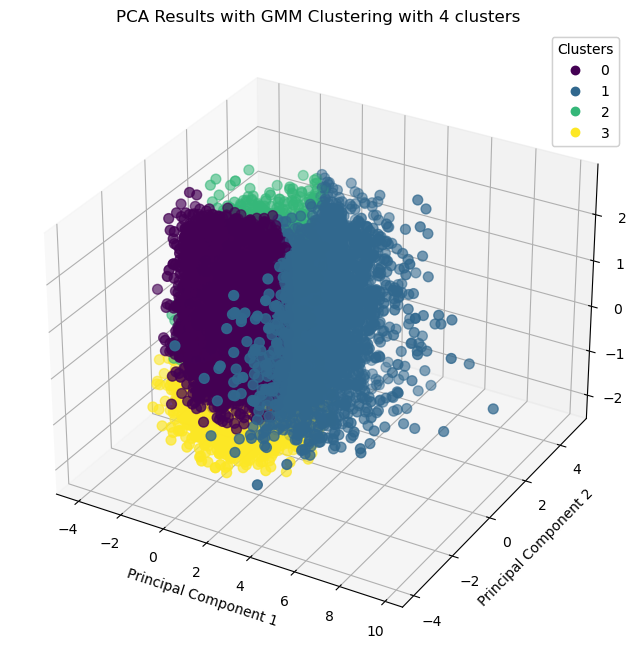

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 假设 filtered_df 已经定义并包含了数据
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

# 使用 .loc 方法进行赋值
filtered_df.loc[:, num_cols] = scaler.fit_transform(filtered_df[num_cols])

# 进行 PCA
n_components = 3  # 调整主成分数量
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# 进行 GMM 分群
n_clusters = 4  # 调整簇数量
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
pca_df['cluster'] = gmm.fit_predict(pca_result)

# 可视化 PCA 3D 结果
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_df['cluster'], cmap='viridis', s=50)

# 添加每个簇的中心点
centers = gmm.means_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, marker='X', edgecolors='black', label='Centers')

# 添加图例和标签
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title(f'PCA Results with GMM Clustering with {n_clusters} clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import plotly.express as px
import plotly.graph_objects as go

# 假设 filtered_df 已经定义并包含了数据
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

# 使用 .loc 方法进行赋值
filtered_df.loc[:, num_cols] = scaler.fit_transform(filtered_df[num_cols])

# 进行 PCA
n_components = 3  # 调整主成分数量
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# 进行 GMM 分群
n_clusters = 4  # 调整簇数量
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
pca_df['cluster'] = gmm.fit_predict(pca_result)

# 绘制3D PCA结果
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster', 
    title='PCA Results with GMM Clustering',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.7  # 使点稍微透明，以便更好地观察
)

# 添加每个簇的中心点
centers = gmm.means_
center_df = pd.DataFrame(centers, columns=['PC1', 'PC2', 'PC3'])

# 使用不同的方式添加簇中心点，增强可视化效果
fig.add_trace(go.Scatter3d(
    x=center_df['PC1'], y=center_df['PC2'], z=center_df['PC3'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Cluster Centers'
))

# 更新图表布局以增加图的尺寸
fig.update_layout(
    width=1000,  # 图的宽度
    height=800,  # 图的高度
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )
)

fig.show()


In [13]:

# pca_df的結果加上情緒標籤
pca_df['mood'] = np.random.choice(['Sad', 'Calm', 'Angry', 'Happy'], len(pca_df))

# 先存到final_df後再做處理(把song_name放回去、刪掉song_name是NaN的資料)
final_df = pd.concat([df[['song_name', 'uri']], pca_df], axis=1)
# 删除 song_name 是 NaN 的行
final_df = final_df.dropna(subset=['song_name'])



detected_mood = input("input（Sad, Calm, Angry, Happy）: ")
valid_moods = ['Sad', 'Calm', 'Angry', 'Happy']


if detected_mood not in valid_moods:
    print("not found please input：Sad or Calm or Angry or Happy")
else:
    filtered_by_mood = final_df[final_df['mood'] == detected_mood]
    if filtered_by_mood.empty:
        print(f"not found any song with {detected_mood} emotion。")
    else:
        random_songs = filtered_by_mood.sample(3)['song_name']
        print("random song with", detected_mood, "emotion is: ")
        print(random_songs.to_list())

        songs = [{"song_name": song_name} for song_name in random_songs]

        from selenium import webdriver
        from selenium.webdriver.common.keys import Keys
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC    
        import time
        import os

        # chrome初始設定
        chrome_options = Options()
        chrome_options.add_argument("--start-maximized")
        chrome_options.add_argument("--disable-infobars")
        chrome_options.add_argument("--disable-extensions")
        chrome_driver_path = os.path.join('chromedriver.exe')


from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Chrome(options=chrome_options)

try:
    for song in songs:
        song_name = song['song_name']
        driver.get("https://www.youtube.com")
        time.sleep(2) 

        # 搜尋
        search_box = driver.find_element(By.NAME, "search_query")
        search_box.send_keys(song_name)
        search_box.send_keys(Keys.RETURN)
        time.sleep(2) 
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "video-title")))

        # 選第二個影片(第一個太常是廣告了 可惡)
        search_results = driver.find_elements(By.ID, "video-title")
        second_video = search_results[1]
        second_video.click()

        time.sleep(5) 

        # 影片播的時長
        time.sleep(30) # 30sec

finally:
    time.sleep(5)  
    driver.quit()


random song with Sad emotion is: 
['Take It Away', 'Saturn', '#PROUDCATOWNERREMIX']


KeyboardInterrupt: 